# Introduction
In this notebook I will be using data analysis techniques in order to answer questions I have posed. I will be using popular python libraries such as Numpy, pandas, and matplotlib. I will be investigating a TMDB movie dataset, which contains records of movies from years 1960 to 2015.

# Questions
1. Do popular movies have high higher ratings?
2. What kinds of properties are associated with movies that have high revenues?
3. Which director has directed the most top preforming movies in terms of revenue
4. Have ratings over the years fallen or increased?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Read in Dataset

In [2]:
file = r'C:\Users\joseph louie\Desktop\Udacity Data Analyst Nanodegree\Project 2\Investigate_Dataset\tmdb-movies.csv'
df = pd.read_csv(file)

In [3]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [4]:
df.shape

(10866, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


# Cleaning

 - drop null values, duplicate values, and values that don't make sense
 - drop imdb_id
 - Budget and revenue 0 min needs to be addressed.
 - Drop Cast
 - There are many values missing for homepage, but I can drop this columns, because it doesn't help answer my questions.
 - Director column has some missing values.
 - Tagline will most likely be dropped.
 - Drop keywords
 - Overview can be dropped. It doesn't help me with my questions.
 - There is a minimum runtime of 0 that needs to be addressed.
 - Inspect genres for missing values
 - Production companies can most likely be dropped because it doesn't answer my questions
 - Budget_adj and revenue_adj can be dropped. I will be using budget and revenue

In [7]:
#split up genres
df = df.join(df.genres.str.strip('|').str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genre')).reset_index(drop=True)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
2,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
3,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
4,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action


Check to see if there are any duplicates

In [8]:
df.duplicated().sum()

5

In [9]:
#drop because only 1
df.drop_duplicates(inplace=True)

In [10]:
#check
df.duplicated().sum()

0

Check why there are movies with a minimum budget of 0.

In [11]:
#filter where there is 0 in the budget column, only return the budget column.
df[df['budget'] == 0]['budget'].count()

13376

There are 5696 rows that have a budget of 0. Dropping them would affect my results. I decided to change the 0 values to null values. I get to keep my data, while also preventing bias.

In [12]:
df['budget'] = df['budget'].replace(0, np.NaN)

In [13]:
#check
df[df['budget'] == 0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre


Investiage why revenue has a minimum of 0

In [14]:
#revenue 0 min
df[df['revenue'] == 0]['revenue'].count()

14314

6016 rows are 0 for revenue. I can't drop these rows because that would consistent of half my data. I decide to change 0 to null value.

In [15]:
df['revenue'] = df['revenue'].replace(0, np.NaN)

In [16]:
#check
df[df['revenue'] == 0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre


Investiage why there are movies with a runtime of 0

In [48]:
runtime_zero = df[df['runtime'] == 0]
runtime_zero

,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year,genre


In [18]:
#Drop the rows where runtime equals 0 and runtime is NaN
df['runtime'] = df[df['runtime'] != 0]
df['runtime'] = df['runtime'].dropna()

In [19]:
#check
df[df['runtime'] == 0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre


In [20]:
#check
df[df['runtime'] == df['runtime'].isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre


Check how many null values the director column has.

In [21]:
df['director'].isnull().sum()

93

In [22]:
#drop null
df['director'].dropna(inplace=True)

In [23]:
#check
df['director'].isnull().sum()

0

Check how many null values genres has.

In [24]:
df['genres'].isnull().sum()

23

In [25]:
#drop null in genres
df['genres'].dropna(inplace=True)

In [26]:
#check
df['genres'].isnull().sum()

0

Drop Columns we aren't going to use

In [27]:
df.drop(columns=['id', 'imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'budget_adj', 'revenue_adj', 'genres', 'release_date'], inplace=True)

In [28]:
#check
df.head()

,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year,genre
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,135397,5562,6.5,2015,Action
1,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,135397,5562,6.5,2015,Adventure
2,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,135397,5562,6.5,2015,Science Fiction
3,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,135397,5562,6.5,2015,Thriller
4,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,76341,6185,7.1,2015,Action


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26978 entries, 0 to 26982
Data columns (total 10 columns):
popularity        26978 non-null float64
budget            13602 non-null float64
revenue           12664 non-null float64
original_title    26978 non-null object
director          26885 non-null object
runtime           26916 non-null object
vote_count        26978 non-null int64
vote_average      26978 non-null float64
release_year      26978 non-null int64
genre             26955 non-null object
dtypes: float64(4), int64(2), object(4)
memory usage: 2.3+ MB


In [30]:
df.describe()

,popularity,budget,revenue,vote_count,vote_average,release_year
count,26978.000000,1.360200e+04,1.266400e+04,26978.000000,26978.000000,26978.000000
mean,0.705653,3.469513e+07,1.009826e+08,249.801579,5.956932,2000.701794
std,1.114621,4.215870e+07,1.783235e+08,637.784544,0.912318,12.764426
min,0.000065,1.000000e+00,2.000000e+00,10.000000,1.500000,1960.000000
25%,0.224439,7.000000e+06,9.532895e+06,18.000000,5.400000,1994.000000
50%,0.410850,2.000000e+07,3.561010e+07,44.000000,6.000000,2005.000000
75%,0.774232,4.500000e+07,1.132875e+08,173.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,9767.000000,9.200000,2015.000000


# Cleaning Summary
1. Drop duplicates
2. Drop rows where runtime is 0
3. Drop null values in director and genres columns
4. Change 0's to NaN in the budget and revenue columns
5. Drop columns that don't help me answer my questions: [imdb_id, cast, homepage, tagline, keywords, overview, production_companies, budget_adj, revenue_adj, genres, release_date]

# Exploratory Data Analysis

# 1. Do longer runtimes have a higher popularity rating?

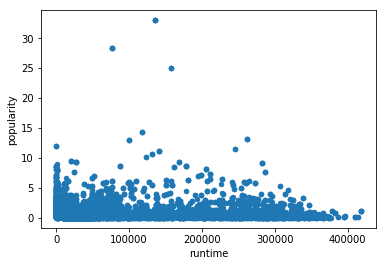

In [31]:
#convert runtime into a float
df['runtime'] = df['runtime'].astype(float)
df.plot(kind='scatter', x='runtime', y='popularity');

It doesn't seem that longer runtimes have high popularity. The opposite may be happening, where longer runtime causes a decrese in popularity. This could be because movie watchers don't want to watch a movie that is extremely long. 

# 2. What kinds of properties are associated with movies that have high revenues?

In [32]:
#movies who have high revenue
top_rev = df[df['revenue'] > df['revenue'].mean()]
top_rev

,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year,genre
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,135397.0,5562,6.5,2015,Action
1,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,135397.0,5562,6.5,2015,Adventure
2,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,135397.0,5562,6.5,2015,Science Fiction
3,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,135397.0,5562,6.5,2015,Thriller
4,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,76341.0,6185,7.1,2015,Action
5,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,76341.0,6185,7.1,2015,Adventure
6,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,76341.0,6185,7.1,2015,Science Fiction
7,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,76341.0,6185,7.1,2015,Thriller
8,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,262500.0,2480,6.3,2015,Adventure
9,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,262500.0,2480,6.3,2015,Science Fiction


In [33]:
top_rev.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3487.000000,3.412000e+03,3.487000e+03,3487.000000,3487.000000,3487.000000,3487.000000
mean,2.202606,7.808075e+07,2.942204e+08,35685.954115,1240.090622,6.363923,2003.028391
std,2.316278,5.458351e+07,2.490856e+08,62318.665229,1305.966143,0.704164,9.605712
min,0.131526,1.130000e+02,1.011341e+08,11.000000,10.000000,4.200000,1961.000000
25%,1.050599,3.800000e+07,1.407819e+08,1647.000000,367.000000,5.900000,1998.000000
50%,1.610259,6.600000e+07,2.080762e+08,9494.000000,756.000000,6.400000,2005.000000
75%,2.563191,1.050000e+08,3.516923e+08,40979.500000,1654.000000,6.900000,2011.000000
max,32.985763,3.800000e+08,2.781506e+09,417859.000000,9767.000000,8.300000,2015.000000


In [34]:
#bottom 50% of movies in terms of revenue
bot_rev = df[df['revenue'] < df['revenue'].mean()].describe()
bot_rev

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,9177.000000,6.891000e+03,9.177000e+03,9177.000000,9177.000000,9177.000000,9177.000000
mean,0.704800,2.359631e+07,2.755769e+07,41493.582761,194.621118,6.047913,1999.478152
std,0.637573,2.476510e+07,2.703661e+07,69204.719237,312.959944,0.801500,12.079996
min,0.001117,1.000000e+00,2.000000e+00,5.000000,10.000000,2.100000,1960.000000
25%,0.336233,7.000000e+06,5.000000e+06,9411.000000,36.000000,5.500000,1991.000000
50%,0.548602,1.700000e+07,1.853519e+07,12663.000000,88.000000,6.100000,2003.000000
75%,0.880268,3.200000e+07,4.279256e+07,35614.000000,223.000000,6.600000,2009.000000
max,11.422751,4.250000e+08,1.008608e+08,358895.000000,5923.000000,8.400000,2015.000000


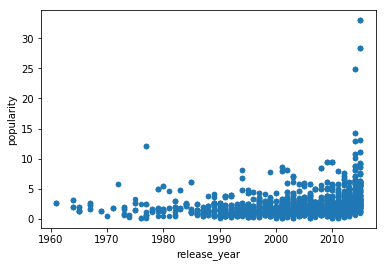

In [35]:
top_rev.plot(kind='scatter', x='release_year', y='popularity');

The above graph tells me that many of the popular movies were released in the later years. Since I do seem to have a couple of outliers, I would use the median instead of the mean. The median popularity is 1.61, which is where most movies are above, espically in the later years. There is most likely a larger amount of releases in the later years most likely due to advancement in technology making it cheaper to produce movies. Popularity takes a part in movies that have higher revenues.

The mean budget is a lot great greater in the movies that produce more revenue compared to the movies that don't perform well. It makes sense that the higher budget movies would preform better. It could be a number of factors such as, better production quality, well known cast member, or directors with a proven track record of success.

# 3. Which director has directed the most top preforming movies in terms of revenue

In [36]:
best_director = top_rev.copy()
#Get the revenue and director columns, sort, and get the top 5 directors 
best_director = best_director[['revenue', 'director']]
best_director = best_director.groupby('director')['revenue'].nunique().reset_index()
#best_director = best_director.sort_values(by='revenue', ascending=False, inplace=False)
best_director = best_director.sort_values('revenue', ascending=False)
best_director = best_director.iloc[:5,:]
best_director

,director,revenue
513,Steven Spielberg,23
445,Robert Zemeckis,12
85,Clint Eastwood,11
427,Ridley Scott,11
457,Ron Howard,10


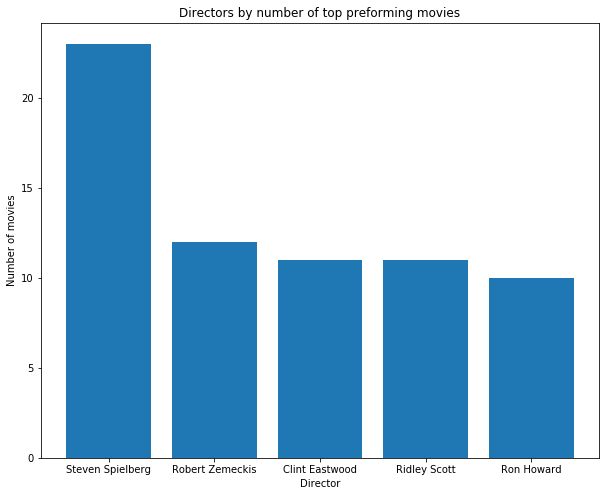

In [37]:
#best_director.plot(kind='bar', x='director', y='revenue');
fig, ax = plt.subplots(figsize=(10,8))
y_pos = np.arange(len(best_director['revenue']))
plt.bar(y_pos, best_director['revenue'])
plt.xticks(y_pos, best_director['director'])
plt.xlabel("Director")
plt.ylabel("Number of movies")
plt.title("Directors by number of top preforming movies")
plt.show()

Steven Spielberg has directed many top preforming movies. He also doubles the number of top preformers as the runner up Robert Zemeckis. When considering who you should let direct your next movie, Steven Spielberg should be come to mind. 

# 4. Have ratings over the years fallen or increased?

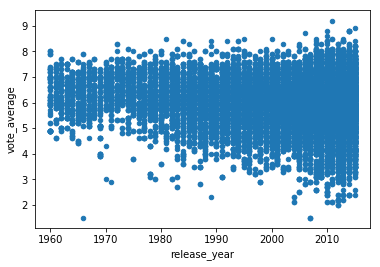

In [38]:
#create a line chart plotting year vs ratings
df.plot(kind='scatter', x='release_year', y='vote_average');

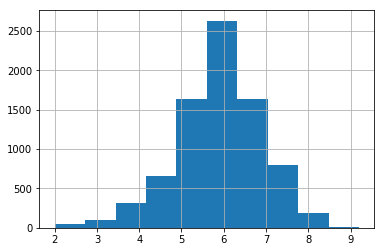

In [39]:
#split year into 5 year gaps
df_2010 = df[df['release_year'] >= 2010]
df_2010.vote_average.hist();

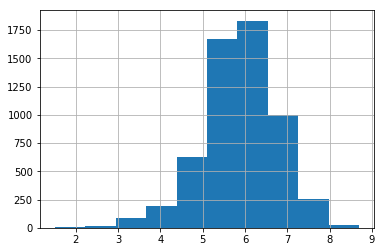

In [40]:
df_2005 = df[(df['release_year'] >= 2005) & (df['release_year'] < 2010)]
df_2005.vote_average.hist();

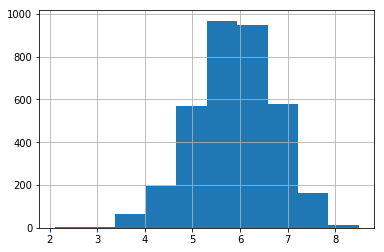

In [41]:
df_2000 = df[(df['release_year'] >= 2000) & (df['release_year'] < 2005)]
df_2000.vote_average.hist();

In [42]:
df_2010.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,8015.000000,3.574000e+03,3.245000e+03,7968.000000,8015.000000,8015.000000,8015.00000
mean,0.883618,4.246712e+07,1.332772e+08,156817.006777,368.228696,5.888971,2012.59738
std,1.664471,5.580892e+07,2.339885e+08,101512.277784,859.493087,1.024072,1.69527
min,0.000620,1.000000e+00,1.000000e+01,189.000000,10.000000,2.000000,2010.00000
25%,0.213853,5.028007e+06,3.100000e+06,65759.000000,19.000000,5.300000,2011.00000
50%,0.418255,2.000000e+07,3.689372e+07,132100.500000,51.000000,5.900000,2013.00000
75%,0.916578,5.500000e+07,1.509625e+08,250657.250000,258.500000,6.600000,2014.00000
max,32.985763,4.250000e+08,2.068178e+09,417859.000000,9767.000000,9.200000,2015.00000


In [43]:
df_2005.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,5706.000000,3.008000e+03,2.641000e+03,5699.000000,5706.000000,5706.000000,5706.000000
mean,0.658096,3.826290e+07,1.071426e+08,19064.749254,240.257624,5.879951,2007.182965
std,0.795151,4.454149e+07,1.954475e+08,27797.368444,601.165280,0.903714,1.405946
min,0.000973,1.000000e+00,3.000000e+00,17.000000,10.000000,1.500000,2005.000000
25%,0.232922,9.000000e+06,9.366227e+06,9682.000000,18.000000,5.300000,2006.000000
50%,0.422423,2.100000e+07,4.159625e+07,13968.000000,46.000000,6.000000,2007.000000
75%,0.767144,5.000000e+07,1.138575e+08,20294.000000,187.000000,6.500000,2008.000000
max,9.432768,3.000000e+08,2.781506e+09,319314.000000,8458.000000,8.700000,2009.000000


In [44]:
df_2000.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3504.000000,2.125000e+03,1.826000e+03,3496.000000,3504.000000,3504.000000,3504.000000
mean,0.719643,4.301417e+07,1.137494e+08,15984.897025,263.039954,5.908362,2002.140982
std,0.882472,3.742949e+07,1.587562e+08,25041.844684,580.938511,0.832481,1.396169
min,0.001117,1.000000e+01,2.000000e+00,12.000000,10.000000,2.100000,2000.000000
25%,0.236418,1.300000e+07,1.872018e+07,7288.000000,21.000000,5.400000,2001.000000
50%,0.451722,3.200000e+07,5.900680e+07,11023.500000,57.000000,5.900000,2002.000000
75%,0.875700,6.500000e+07,1.440569e+08,17043.000000,224.000000,6.500000,2003.000000
max,8.575419,2.000000e+08,1.118889e+09,331214.000000,6079.000000,8.500000,2004.000000


In [45]:
df[df['release_year'] < 2000].describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,9753.000000,4.895000e+03,4.952000e+03,9753.000000,9753.000000,9753.000000,9753.000000
mean,0.582199,2.321670e+07,7.182734e+07,16423.156362,153.305855,6.075269,1986.617143
std,0.683961,2.499562e+07,1.190993e+08,18310.041510,405.670429,0.831750,10.318763
min,0.000065,1.000000e+00,2.000000e+00,5.000000,10.000000,1.500000,1960.000000
25%,0.223994,5.000000e+06,1.111719e+07,8874.000000,16.000000,5.600000,1981.000000
50%,0.386432,1.500000e+07,2.830202e+07,11624.000000,35.000000,6.100000,1989.000000
75%,0.676667,3.200000e+07,7.966665e+07,21866.000000,108.000000,6.600000,1995.000000
max,12.037933,2.000000e+08,1.845034e+09,323636.000000,6351.000000,8.500000,1999.000000


Spliting up the data every 5 years helps me determine if there is some sort of trend. We can see that vote_count increases every couple of years. We also see that the mean vote_average hasn't changed through out the years. Ratings over the years haven't changed.

# Conclusions

#### In this analysis of the TMDB Dataset I look over some questions that highlight certain aspects of movies that help it to perform better then others. 
- Runtimes don't have a large impact on whether a movie is popular or not, but having a movie be too long can hurt it's chances.
- Larger budgets seems to preform better then ones with lower budgets.
- Popularity of the movie is a factor. The popular the movie, the higher the chance of it increasing it's revenue.
- Directors play a big role is seeing how a movie turn out. Steven Spielberg has over 20 well preforming movies in the past. He maybe the guy to call when creating a movie.
- Ratings over the years haven't changed too much.

I haven't preformed any statistical test, so there are no statistical conclusions. Just because you have a high budget doesn't mean that the movie will preform well. Correlation does not imply causation.